In [62]:
import lasio
%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

In [63]:
#las=lasio.read("D:/Jamal/Fall 20/ML Brittleness prediction/Well logs/Smith 1H - Kirk Barell/HALCON_SD_Smith_1H_TMS_811162_CQL_13120-13509_5ft.las")
las=lasio.read("HALCON_SD_Smith_1H_TMS_811162_HRA.las")
las2=lasio.read("D:/Jamal/Fall 20/ML Brittleness prediction/Well logs/Smith 1H - Kirk Barell/2315722102   HALCON_SD_SMITH_1H_PILOT_RUN2A_PEX-TCOM_MAIN-GenericV12-Copy.las")

In [64]:
las.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="3.0", descr="CWLS LOG ASCII STAN...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="ONE LINE PER DEPTH S...),
  HeaderItem(mnemonic="DLM", unit="", value="SPACE", descr="DELIMITING CHARACT...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="ft", value="12625", descr="First reference...),
  HeaderItem(mnemonic="STOP", unit="ft", value="13509.5", descr="Last referenc...),
  HeaderItem(mnemonic="STEP", unit="ft", value="0.5", descr="Step increment"),
  HeaderItem(mnemonic="NULL", unit="", value="-9999", descr="Missing value"),
  HeaderItem(mnemonic="COMP", unit="", value="Halcon", descr="Company"),
  HeaderItem(mnemonic="WELL", unit="", value="SD SMITH 1H", descr="Well name"),
  HeaderItem(mnemonic="FLD", unit="", value="Wildcat", descr="Field"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="Location"),
  HeaderItem(mnemonic="SRVC", unit="", value="SCHLUMBERGER", descr="Service Co...),
  HeaderItem(mnemonic="CTRY"

In [65]:
las2.header

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="1.2", descr="CWLS Log ASCII Stan...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One Line per depth s...),
  HeaderItem(mnemonic="PROD", unit="", value="Schlumberger", descr="LAS Producer"),
  HeaderItem(mnemonic="PROG", unit="", value="DLIS to ASCII 17C0-152", descr="...),
  HeaderItem(mnemonic="CREA", unit="", value="2014/06/28 10:21                ...),
  HeaderItem(mnemonic="DLIS_CREA", unit="", value="2014-Jun-27 22:05          ...),
  HeaderItem(mnemonic="SOURCE", unit="", value="9f8a30ae-b142-42c1-aae7-29beb5...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="F", value="3235.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="F", value="13554.0", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="F", value="0.5", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="HALCON RESOURCES", descr="COMPANY"),
  Header

In [66]:
df_hra = las.df()
df_elan = las2.df()

In [67]:
df=df_elan.join(df_hra,how='outer')
Well_name="Smith"
df=df.loc[:,["RHOZ","GR","AT90","DPHZ","NPHI","HRA_TAG2TMS","ERR_HRA_TAG2TMS"]]

In [68]:
df

,RHOZ,GR,AT90,DPHZ,NPHI,HRA_TAG2TMS,ERR_HRA_TAG2TMS
3235.0,2.1003,21.1544,0.6203,0.3332,NaN,NaN,NaN
3235.5,2.1003,21.1544,0.6203,0.3332,NaN,NaN,NaN
3236.0,2.1003,21.1544,0.6203,0.3332,NaN,NaN,NaN
3236.5,2.1003,21.1544,0.6203,0.3332,NaN,NaN,NaN
3237.0,2.1003,21.1544,0.6203,0.3332,NaN,NaN,NaN
...,...,...,...,...,...,...,...
13552.0,NaN,116.5624,2.3460,NaN,0.1945,NaN,NaN
13552.5,NaN,116.5624,2.3460,NaN,0.1945,NaN,NaN
13553.0,NaN,116.5624,2.3460,NaN,0.1945,NaN,NaN
13553.5,NaN,116.5624,2.3460,NaN,0.1945,NaN,NaN


In [69]:
# def logs(las_file,las_file2):
    
#     df = las_file.df()
#     df2 = las_file2.df()
#     Dens=pd.DataFrame(df2[Dens_name])
#     GR=pd.DataFrame(df2[GR_name])
#     Res=pd.DataFrame(df2[Res_name])
#     Por_dens=pd.DataFrame(df2[Por_dens_name])
#     Por_neut=pd.DataFrame(df2[Por_neut_name])
#     Rock_class=pd.DataFrame(df[Rock_class_name])
#     Logs_comb=pd.concat([Dens,GR,Res,Por_dens,Por_neut,Rock_class],axis=1)
#     return Logs_comb

In [70]:
# Vel=logs(las,las2)
# Vel.info()

In [71]:
# def logs_mod(dataframe):
    
#     Dens_f=dataframe[Dens_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     GR_f=dataframe[GR_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Res_f=dataframe[Res_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Por_dens_f=dataframe[Por_dens_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Por_neut_f=dataframe[Por_neut_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Vp_f=dataframe[Vp_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Vs_f=dataframe[Vs_name].loc[dataframe.loc[pd.notna(dataframe[Vs_name]), :].index]
#     Logs_comb_f=pd.concat([Dens_f,GR_f,Res_f,Por_dens_f,Por_neut_f,Vp_f,Vs_f],axis=1)
#     return Logs_comb_f

In [72]:
# Vel_f=logs_mod(Vel)
# Vel_f.info()

In [73]:
def tms(df,form_top,form_bottom):
    df_tms=df[form_top:form_bottom]
    return df_tms

In [74]:
tms_start_depth=12625
tms_stop_depth=13509.5
Vel_ub=tms(df,tms_start_depth,tms_stop_depth)
Vel_ub

,RHOZ,GR,AT90,DPHZ,NPHI,HRA_TAG2TMS,ERR_HRA_TAG2TMS
12625.0,2.6229,71.1925,8.4110,0.0510,0.0692,2.0,13.108580
12625.5,2.6258,54.7387,12.5815,0.0492,0.0305,12.0,8.831389
12626.0,2.6264,51.4481,15.6841,0.0489,0.0272,12.0,9.622502
12626.5,2.6419,46.0418,18.1532,0.0398,0.0257,12.0,11.537320
12627.0,2.6417,41.1057,20.7298,0.0400,0.0218,12.0,13.364790
...,...,...,...,...,...,...,...
13507.5,2.6705,115.1767,4.1747,0.0231,0.1940,3.0,5.141343
13508.0,2.6701,118.4018,4.0679,0.0233,0.1883,6.0,4.632615
13508.5,2.6662,116.9820,4.0815,0.0256,0.1905,6.0,5.606164
13509.0,2.6623,115.2100,4.5443,0.0279,0.1962,3.0,4.409150


In [75]:
# writer = pd.ExcelWriter('Well-'+Well_name+'.xlsx', engine='xlsxwriter')
# Vel_ub.to_excel(writer,sheet_name=Well_name)
# writer.save()

In [76]:
df2=Vel_ub
df2.reset_index(inplace=True)
df2.head()

,index,RHOZ,GR,AT90,DPHZ,NPHI,HRA_TAG2TMS,ERR_HRA_TAG2TMS
0,12625.0,2.6229,71.1925,8.4110,0.0510,0.0692,2.0,13.108580
1,12625.5,2.6258,54.7387,12.5815,0.0492,0.0305,12.0,8.831389
2,12626.0,2.6264,51.4481,15.6841,0.0489,0.0272,12.0,9.622502
3,12626.5,2.6419,46.0418,18.1532,0.0398,0.0257,12.0,11.537320
4,12627.0,2.6417,41.1057,20.7298,0.0400,0.0218,12.0,13.364790


In [77]:
cols = ['Depth','Density','Gamma ray','Resistivity','Density porosity','Neutron porosity','Rock class','Rock class error']
df2.columns=cols
df2

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
0,12625.0,2.6229,71.1925,8.4110,0.0510,0.0692,2.0,13.108580
1,12625.5,2.6258,54.7387,12.5815,0.0492,0.0305,12.0,8.831389
2,12626.0,2.6264,51.4481,15.6841,0.0489,0.0272,12.0,9.622502
3,12626.5,2.6419,46.0418,18.1532,0.0398,0.0257,12.0,11.537320
4,12627.0,2.6417,41.1057,20.7298,0.0400,0.0218,12.0,13.364790
...,...,...,...,...,...,...,...,...
1765,13507.5,2.6705,115.1767,4.1747,0.0231,0.1940,3.0,5.141343
1766,13508.0,2.6701,118.4018,4.0679,0.0233,0.1883,6.0,4.632615
1767,13508.5,2.6662,116.9820,4.0815,0.0256,0.1905,6.0,5.606164
1768,13509.0,2.6623,115.2100,4.5443,0.0279,0.1962,3.0,4.409150


In [95]:
df2.iloc[1655:1665]

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
1659,13454.5,2.6057,112.5033,7.0745,0.0610,0.2814,9.0,1.264094
1660,13455.0,2.6246,104.8930,6.7583,0.0500,0.2455,7.0,3.188115
1661,13455.5,2.6463,97.2831,7.6386,0.0372,0.2018,4.0,4.326546
1662,13456.0,2.6540,93.3757,8.4282,0.0328,0.1872,4.0,6.529431
1663,13456.5,2.6241,87.6170,9.6750,0.0503,0.2182,4.0,4.286257
1664,13457.0,2.5965,82.4753,10.9260,0.0664,0.2114,4.0,7.240319
1665,13457.5,2.6039,73.2198,10.6600,0.0620,0.2003,2.0,9.562478
1666,13458.0,2.6563,68.9007,9.4725,0.0314,0.1798,2.0,3.843463
1667,13458.5,2.7119,63.3474,8.0886,-0.0011,0.1796,2.0,3.823598
1668,13459.0,2.7535,69.3120,7.5717,-0.0254,0.1822,2.0,6.409389


In [98]:
df2[df2['Rock class']==4]

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
1320,13285.0,2.6363,79.1837,7.9516,0.0431,0.2121,4.0,3.764620
1321,13285.5,2.6378,80.6236,7.9048,0.0422,0.2088,4.0,3.356449
1322,13286.0,2.6440,83.2976,7.7587,0.0386,0.2086,4.0,4.309266
1324,13287.0,2.6445,80.7413,7.3138,0.0383,0.2057,4.0,4.575313
1325,13287.5,2.6334,78.0676,7.1041,0.0448,0.2035,4.0,3.375091
...,...,...,...,...,...,...,...,...
1649,13449.5,2.6305,106.3040,8.0114,0.0465,0.2328,4.0,10.292140
1661,13455.5,2.6463,97.2831,7.6386,0.0372,0.2018,4.0,4.326546
1662,13456.0,2.6540,93.3757,8.4282,0.0328,0.1872,4.0,6.529431
1663,13456.5,2.6241,87.6170,9.6750,0.0503,0.2182,4.0,4.286257


In [99]:
df2[df2['Rock class']==5]

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
1329,13289.5,2.3500,78.5970,6.2004,0.2105,0.3111,5.0,5.794120
1330,13290.0,2.3863,80.4478,5.9605,0.1893,0.3080,5.0,7.074100
1331,13290.5,2.5561,88.8509,5.8181,0.0900,0.2898,5.0,5.766144
1391,13320.5,2.6549,98.4001,6.6965,0.0322,0.2353,5.0,3.827774
1392,13321.0,2.6546,102.9248,6.7831,0.0324,0.2373,5.0,2.474978
...,...,...,...,...,...,...,...,...
1692,13471.0,2.6750,119.9071,9.0465,0.0205,0.2430,5.0,7.724369
1693,13471.5,2.6729,125.3692,9.3633,0.0217,0.2732,5.0,8.877186
1694,13472.0,2.6689,120.8440,8.9593,0.0240,0.2849,5.0,4.969285
1695,13472.5,2.6702,112.8229,7.3668,0.0233,0.2674,5.0,2.861130


In [97]:
df2.describe()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,13067.295184,2.656081,89.171495,5.820671,0.031531,0.203134,5.585836,8.526532
std,255.363290,0.032888,22.084453,5.971522,0.019232,0.071873,2.550204,5.445951
min,12625.000000,2.350000,13.515700,1.371200,-0.029500,0.006500,2.000000,0.459749
25%,12846.000000,2.637300,82.710300,2.357400,0.019700,0.165600,3.000000,4.479609
50%,13067.500000,2.656700,95.550500,3.471100,0.031200,0.222400,6.000000,7.311182
75%,13288.000000,2.676300,103.365900,6.758300,0.042500,0.253800,6.000000,11.169290
max,13509.500000,2.760500,137.015700,40.645800,0.210500,0.350700,12.000000,34.995050


In [79]:
def strat_split(df_f,test):

    df_f=df_f.astype('float64')
    df_f.dropna(inplace=True)
    df_f.reset_index(drop=True,inplace=True)
    split = StratifiedShuffleSplit(n_splits=1, test_size=test, random_state=42)
    for train_index, test_index in split.split(df_f, df_f["Rock class"]):
        strat_train_set = df_f.loc[train_index]
        strat_test_set = df_f.loc[test_index]
    
    strat_prop=strat_test_set["Rock class"].value_counts() / len(strat_test_set)
    full_data=df_f["Rock class"].value_counts() / len(df_f)
    train_set, test_set = train_test_split(df_f, test_size=0.2, random_state=42)
    random=test_set["Rock class"].value_counts() / len(test_set)
    compare=pd.concat([full_data,strat_prop,random],axis=1)
    compare.columns=['Full dataset','Stratified sampling','Random sampling']
    
    return strat_train_set, strat_test_set,compare

In [80]:
df2.groupby('Rock class').count()

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class error
Rock class,,,,,,,
1.0,4,4,4,4,4,4,4
2.0,203,203,203,203,203,203,203
3.0,271,271,271,271,271,271,271
4.0,94,94,94,94,94,94,94
5.0,86,86,86,86,86,86,86
6.0,783,783,783,783,783,783,783
7.0,112,112,112,112,112,112,112
8.0,1,1,1,1,1,1,1
9.0,63,63,63,63,63,63,63


In [81]:
df2.drop(df2[df2['Rock class']==8].index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [82]:
df2.drop(df2[df2['Rock class']==1].index,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
df2[df2['Rock class']==1]

,Depth,Density,Gamma ray,Resistivity,Density porosity,Neutron porosity,Rock class,Rock class error


In [84]:
writer = pd.ExcelWriter('Well-'+Well_name+'.xlsx', engine='xlsxwriter')
df2.to_excel(writer,sheet_name=Well_name)
writer.save()

In [85]:
train_set, test_set,sampling_table=strat_split(df2,0.25)
sampling_table

,Full dataset,Stratified sampling,Random sampling
2.0,0.115014,0.115385,0.118980
3.0,0.153541,0.153846,0.181303
4.0,0.053258,0.052036,0.059490
5.0,0.048725,0.047511,0.045326
6.0,0.443626,0.443439,0.430595
7.0,0.063456,0.063348,0.050992
9.0,0.035694,0.036199,0.031161
11.0,0.028895,0.029412,0.036827
12.0,0.057790,0.058824,0.045326


In [86]:
X_train=train_set[['Depth','Density','Gamma ray','Resistivity','Neutron porosity']]
X_test=test_set[['Depth','Density','Gamma ray','Resistivity','Neutron porosity']]
y_train=train_set['Rock class']
y_test=test_set['Rock class']

In [87]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler=MinMaxScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test))

In [88]:
class_names=np.sort(df2['Rock class'].unique())

In [89]:
def cross_val(model_name,model_input):
    
    model=model_input
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_train_scaled)
    train_acc=accuracy_score(y_train, predictions)
    
    #Cross-validation
    scores = cross_val_score(model, X_train_scaled, y_train, cv=3)
    #rmse_scores = np.sqrt(-scores)
    
    print("Accuracy on whole training set:", train_acc)
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
    titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_train_scaled, y_train,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        
    #return graph

Accuracy on whole training set: 0.8987150415721844
Scores: [0.87528345 0.87528345 0.90022676]
Mean: 0.8835978835978837
Standard deviation: 0.011758389407486046


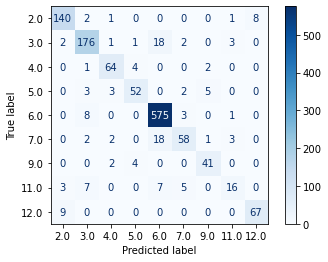

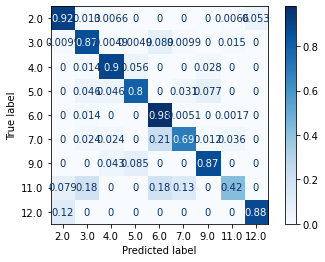

In [90]:
from sklearn.svm import SVC
svm_clf_lin=SVC(kernel='linear',C=100) #Linear
cross_val('svm_clf_lin',svm_clf_lin)

Accuracy on whole training set: 0.9281934996220711
Scores: [0.9047619  0.89569161 0.91156463]
Mean: 0.9040060468631897
Standard deviation: 0.006502135500410172


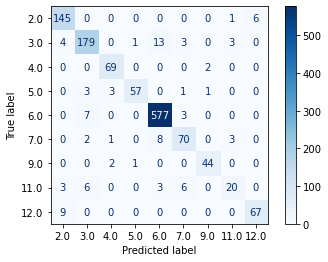

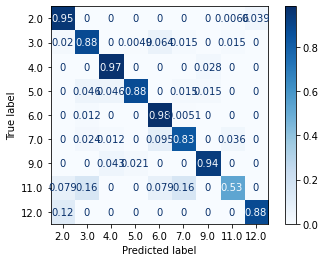

In [91]:
svm_clf_poly=SVC(kernel='poly',degree=2,C=100) #Polynomial
cross_val('svm_clf_poly',svm_clf_poly)

Accuracy on whole training set: 0.8616780045351474
Scores: [0.84580499 0.85034014 0.83900227]
Mean: 0.8450491307634165
Standard deviation: 0.004659421015093699


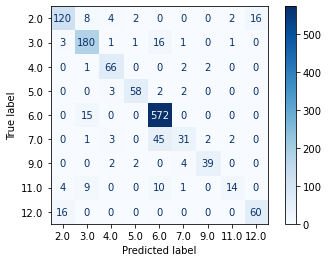

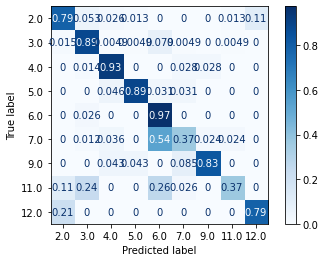

In [92]:
svm_clf_rbf=SVC(kernel='rbf',degree=3,gamma='scale') #RBF
cross_val('svm_clf_rbf',svm_clf_rbf)

Accuracy on whole training set: 0.9508692365835223
Scores: [0.89115646 0.87755102 0.88888889]
Mean: 0.8858654572940287
Standard deviation: 0.00595163104611626


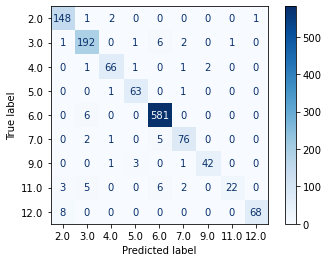

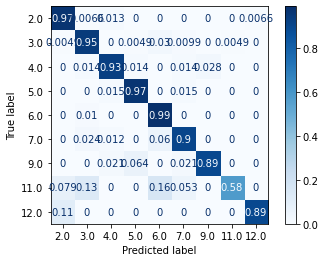

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(max_depth=6,n_estimators=500,random_state=42)
cross_val('rf_clf',rf_clf)

Accuracy on whole training set: 0.99848828420257
Scores: [0.86848073 0.86621315 0.86621315]
Mean: 0.8669690098261528
Standard deviation: 0.0010689444915896597


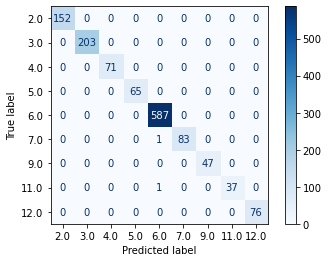

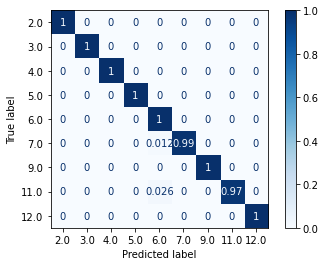

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(max_depth=5,n_estimators=200,learning_rate=0.01)
cross_val('gb_clf',gb_clf)

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import joblib
from sklearn.metrics import r2_score

def fine_tune(params,model,name):
    
    grid_search_cv = GridSearchCV(model, params, verbose=1, cv=3,refit=True, return_train_score=True)
    grid_search_cv.fit(X_train_scaled, y_train)
    best_mod=grid_search_cv.best_estimator_
    best_score=grid_search_cv.best_score_
    cvres = grid_search_cv.cv_results_
    
    for mean_score,mean_train_score, params in zip(cvres["mean_test_score"], cvres["mean_train_score"], cvres["params"]):
        print(mean_score, mean_train_score, params)
    
    joblib.dump(best_mod, name)
    
    return best_mod, best_score

In [53]:
params = {'max_depth': list(range(2, 4)),'n_estimators': [50,100,150], 'learning_rate': [0.05, 0.1, 0.5]}
fine_tune(params,GradientBoostingClassifier(random_state=42),'GB')

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:  1.1min finished


0.8609221466364323 0.9312169312169312 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
0.8775510204081632 0.9773242630385487 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
0.8805744520030233 0.9947089947089948 {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
0.8752834467120182 0.9799697656840515 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
0.8881330309901738 0.9996220710506426 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
0.8866213151927438 1.0 {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
0.873015873015873 0.9799697656840514 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50}
0.8858654572940287 0.99848828420257 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
0.8828420256991686 1.0 {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 150}
0.8843537414965986 0.9996220710506426 {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.8888888888888888 1.0 {'learning_rate': 0.1, 'max_

(GradientBoostingClassifier(random_state=42), 0.8888888888888888)

In [54]:
params_svm = [{'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']},
                {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
fine_tune(params_svm,SVC(),'SVM')

Fitting 3 folds for each of 29 candidates, totalling 87 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.6205593348450491 0.6254724111866969 {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.4444444444444445 0.4452003023431595 {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.4436885865457294 0.4436885865457294 {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.4436885865457294 0.4436885865457294 {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.4436885865457294 0.4436885865457294 {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.82010582010582 0.8284202569916855 {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.6477702191987906 0.6477702191987906 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.4459561602418745 0.44557823129251695 {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.4436885865457294 0.4436885865457294 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.4436885865457294 0.4436885865457294 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.8775510204081632 0.8949357520786093 {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8125472411186697 0.8238851095993954 {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.6492819349962207 0.6481481481481483 {'C': 10,

[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed:    2.8s finished


(SVC(C=1000, gamma=1), 0.9108087679516251)

In [55]:
params_rf = [{'n_estimators': [30,50,70,90,110], 'max_depth': [2,4,6],'min_samples_leaf': [1,3,5]}]
fine_tune(params_rf,RandomForestClassifier(),'RF')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   15.0s finished


0.710506424792139 0.7226001511715797 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 30}
0.6878306878306878 0.7044595616024187 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 50}
0.7014361300075587 0.708994708994709 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 70}
0.6931216931216931 0.7086167800453514 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 90}
0.7021919879062736 0.7180650037792894 {'max_depth': 2, 'min_samples_leaf': 1, 'n_estimators': 110}
0.726379440665155 0.7335600907029479 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 30}
0.7112622826908542 0.7241118669690098 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 50}
0.6991685563114135 0.7142857142857144 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 70}
0.7052154195011338 0.7139077853363567 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 90}
0.7021919879062736 0.7180650037792895 {'max_depth': 2, 'min_samples_leaf': 3, 'n_estimators': 110}
0.7067271352985639 0.

(RandomForestClassifier(max_depth=6, n_estimators=110), 0.891912320483749)

## Predict for test set

In [58]:
model_name='SVM'
loaded_model = joblib.load(model_name)
final_predictions=loaded_model.predict(X_test_scaled)
test_acc=accuracy_score(y_test, final_predictions)
test_acc

0.581447963800905

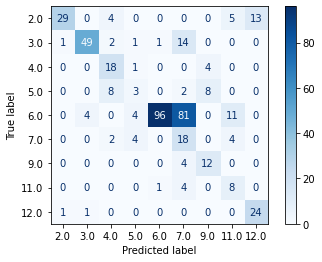

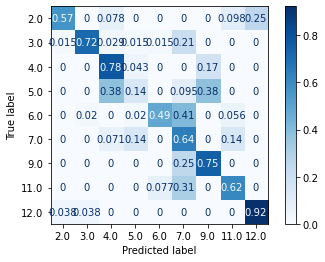

In [61]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
        disp = plot_confusion_matrix(loaded_model, X_test_scaled, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)